In [1]:
from utils.image_processing import preview_image, normalize_image, denormalize_image, noice_image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2

## Preview Images

In [2]:
img = cv2.imread("images/IMG_7539.png")

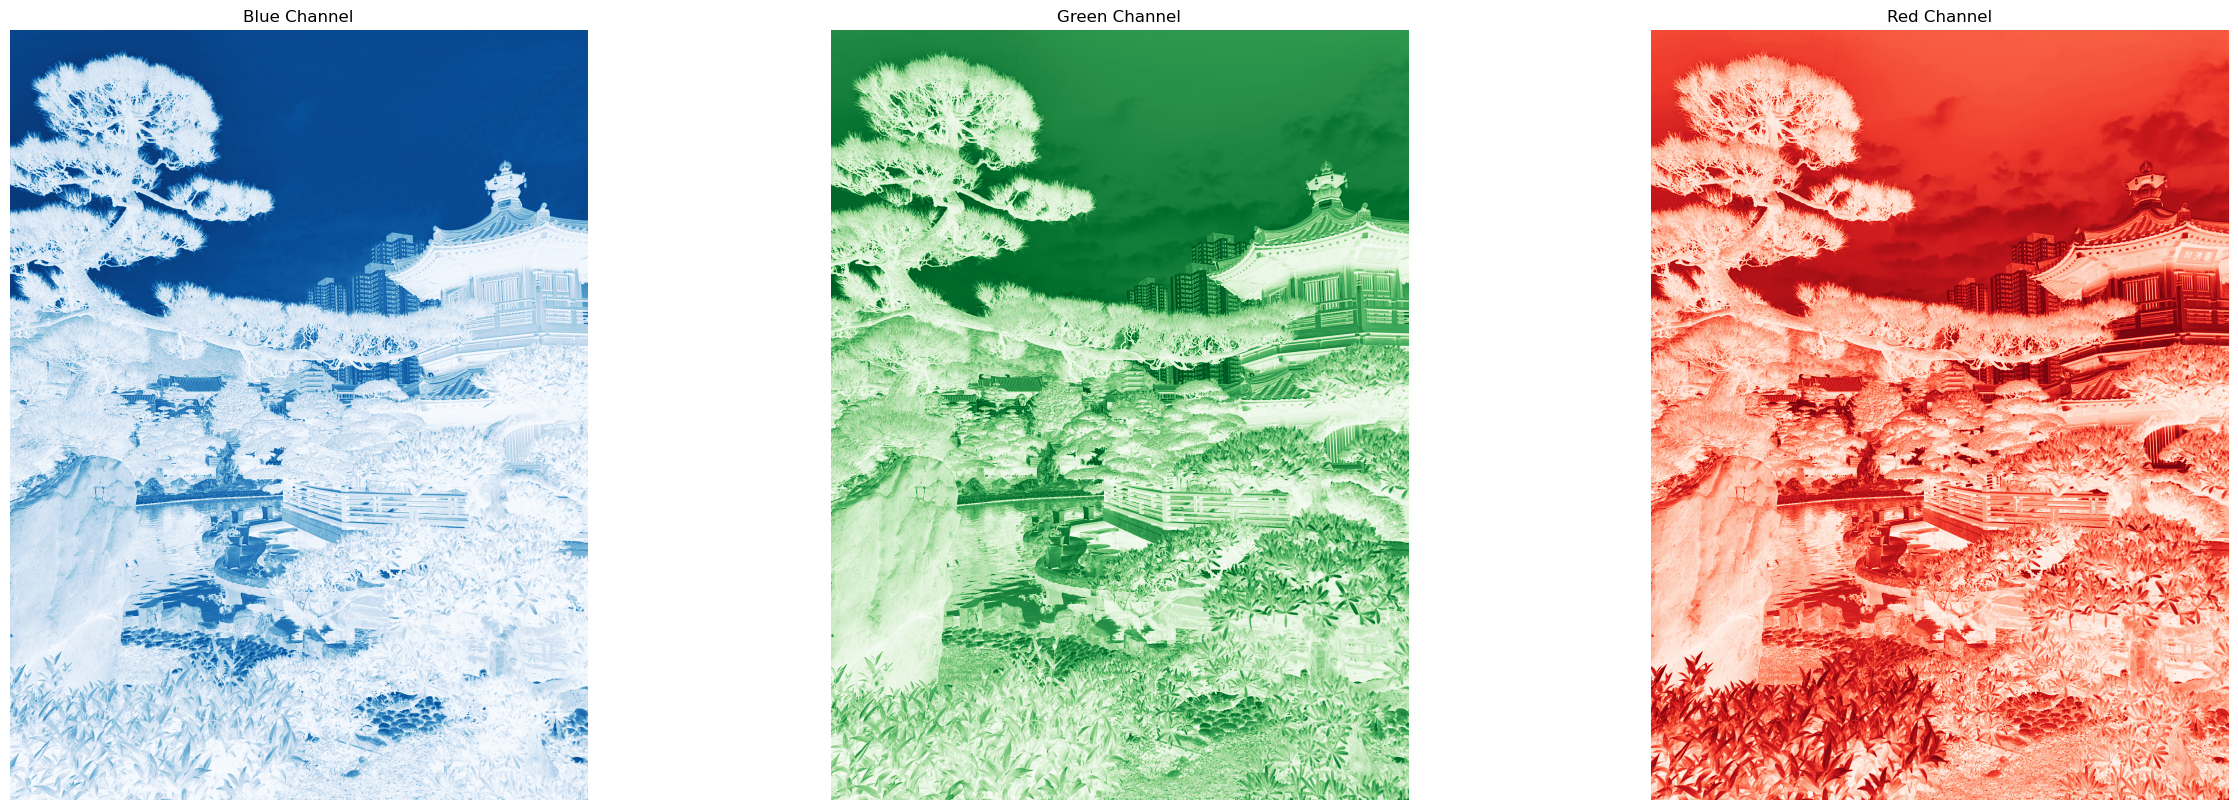

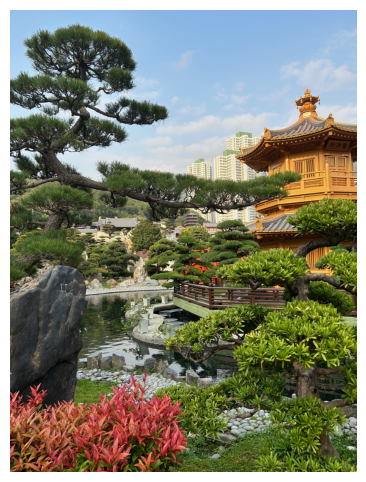

In [3]:
preview_image(img)

## Markov Chain (noice)

In [4]:
normal_image = normalize_image(img)
print(f"Min: {normal_image.min()} Max: {normal_image.max()}")

Min: -1.0 Max: 0.968627450980392


In [5]:
reverse_normal_image = denormalize_image(normal_image)
print(f"Min: {reverse_normal_image.min()} Max: {reverse_normal_image.max()}")

Min: 0 Max: 251


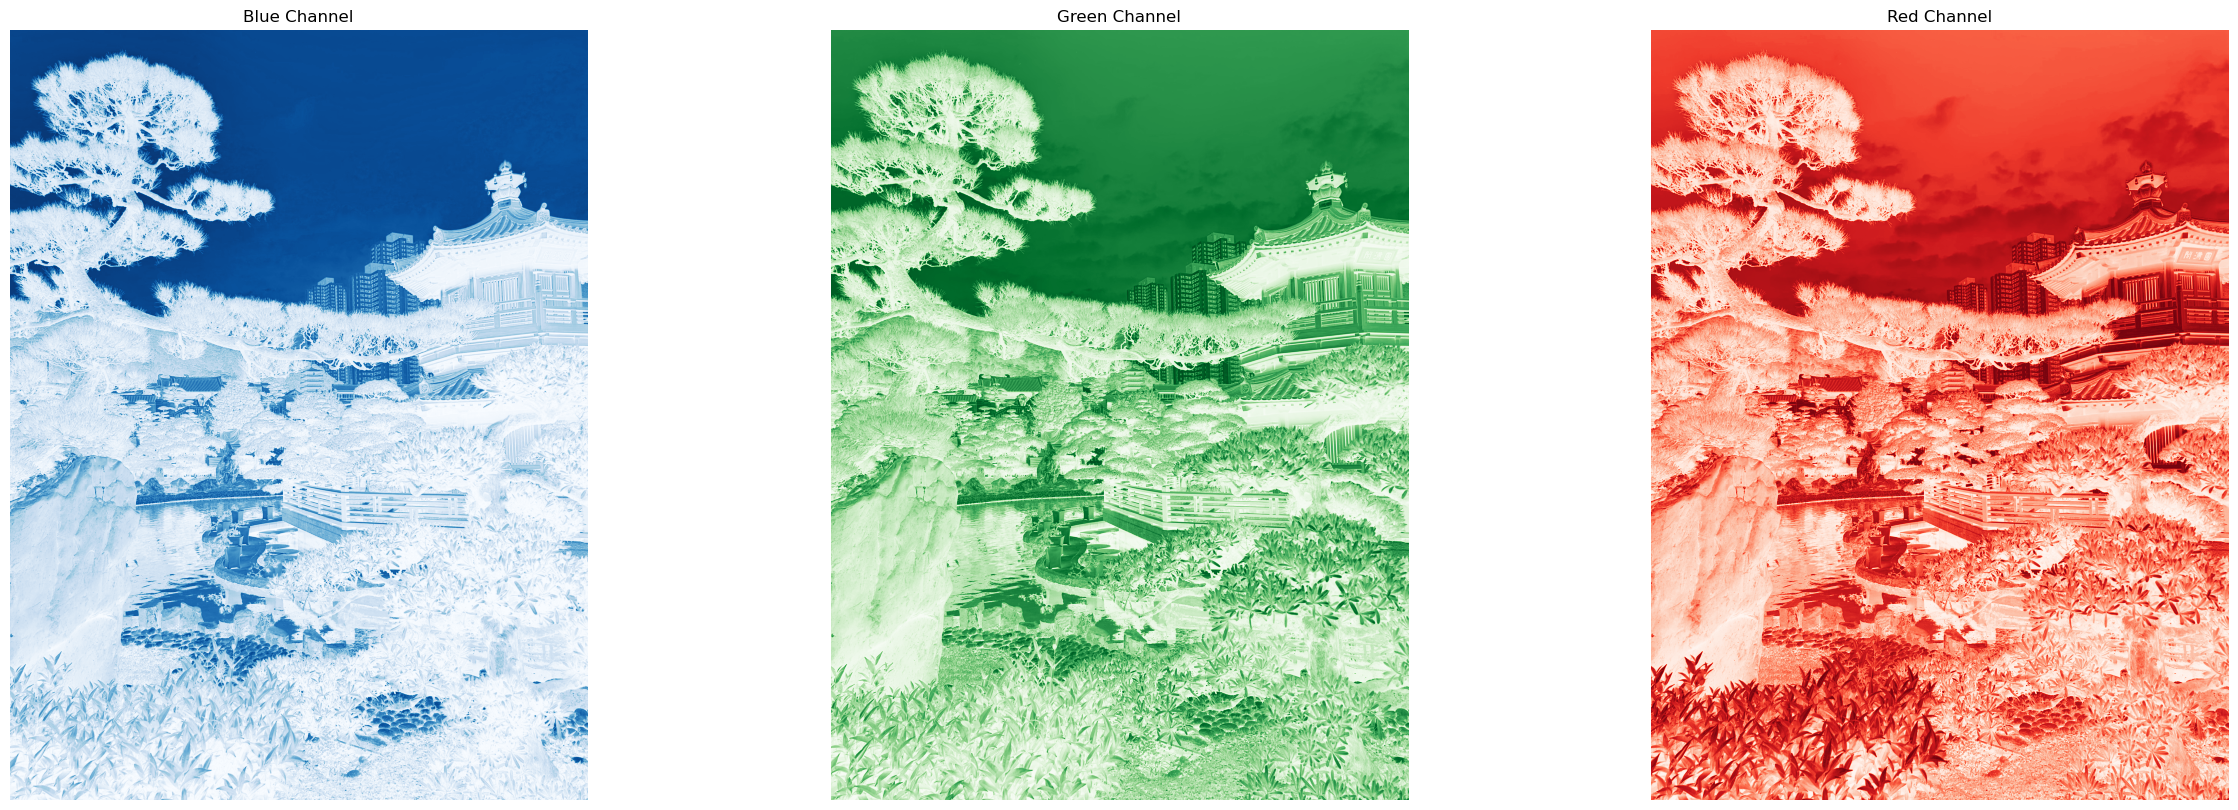

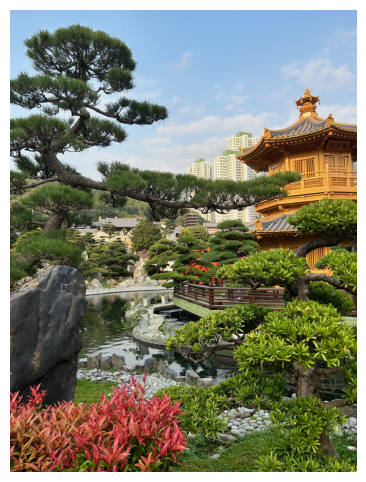

In [6]:
preview_image(reverse_normal_image)

Noice: Min: -0.07055119052461903 Max: 0.05428403828894068
Img Noice: Min: 118 Max: 134


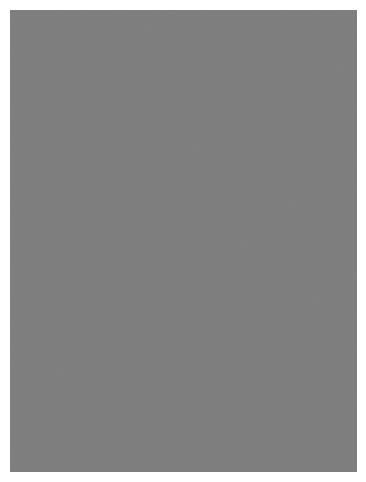

In [7]:
_, noice = noice_image(normal_image, 0.0, 0.01, noice_type="mult")
img_noice = denormalize_image(noice)

print(f"Noice: Min: {noice.min()} Max: {noice.max()}")
print(f"Img Noice: Min: {img_noice.min()} Max: {img_noice.max()}")

preview_image(denormalize_image(noice), show_channels=False)

Noice: Min: 0.9423338428941309 Max: 1.0521793586678145
Img Noice: Min: 247 Max: 261


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


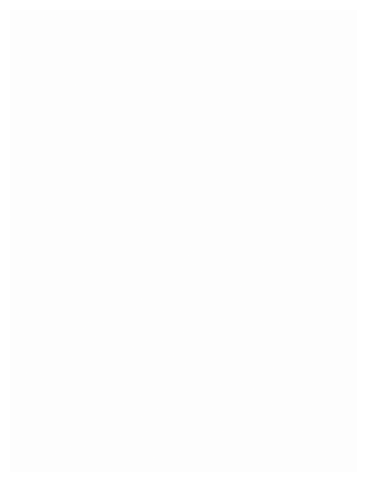

In [8]:
beta0 = 0.01
mu = (1-beta0)**0.5
std = beta0

_, noice_beta = noice_image(normal_image, mu, std, noice_type="mult")
img_noice_beta = denormalize_image(noice_beta)

print(f"Noice: Min: {noice_beta.min()} Max: {noice_beta.max()}")
print(f"Img Noice: Min: {img_noice_beta.min()} Max: {img_noice_beta.max()}")

preview_image(denormalize_image(noice_beta), show_channels=False)

In [9]:
denormalize_image(noice_beta).min(), denormalize_image(noice_beta).max()

(247, 261)

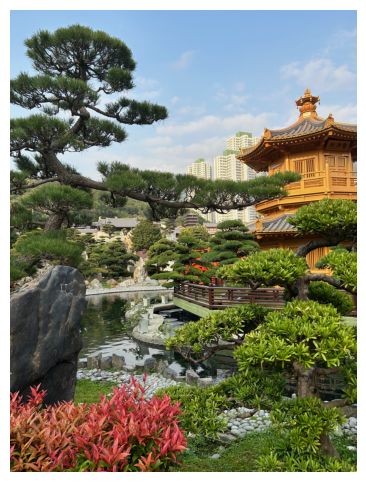

In [10]:
beta0 = 0.01
mu = (1-beta0)**0.5
std = beta0

noiced_img, noice_beta = noice_image(normal_image, mu, std, noice_type="mult")

preview_image(denormalize_image(noiced_img), vmin=0, vmax=255, show_channels=False)

In [12]:
from utils.image_processing import markov_chain_noice

In [13]:
img0 = normal_image
print(img0.min(), img0.max())

-1.0 0.968627450980392


In [ ]:
images = markov_chain_noice(img0, starting_beta=1e-4, final_beta=0.02, T=1000)

Noicing data 1 out of 1000...
Noicing data 2 out of 1000...
Noicing data 3 out of 1000...
Noicing data 4 out of 1000...
Noicing data 5 out of 1000...
Noicing data 6 out of 1000...
Noicing data 7 out of 1000...
Noicing data 8 out of 1000...
Noicing data 9 out of 1000...
Noicing data 10 out of 1000...
Noicing data 11 out of 1000...
Noicing data 12 out of 1000...
Noicing data 13 out of 1000...
Noicing data 14 out of 1000...
Noicing data 15 out of 1000...
Noicing data 16 out of 1000...
Noicing data 17 out of 1000...
Noicing data 18 out of 1000...
Noicing data 19 out of 1000...
Noicing data 20 out of 1000...
Noicing data 21 out of 1000...
Noicing data 22 out of 1000...
Noicing data 23 out of 1000...
Noicing data 24 out of 1000...
Noicing data 25 out of 1000...
Noicing data 26 out of 1000...
Noicing data 27 out of 1000...
Noicing data 28 out of 1000...
Noicing data 29 out of 1000...
Noicing data 30 out of 1000...
Noicing data 31 out of 1000...
Noicing data 32 out of 1000...


In [15]:
images[0].min(), images[0].max()

(-1.0, 0.968885849203534)

In [16]:
images[-1].min(), images[-1].max()

(-1.0, 0.9267781346274029)

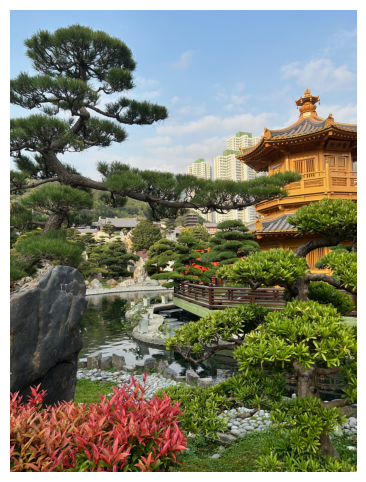

In [17]:
preview_image(denormalize_image(images[0]), show_channels=False)

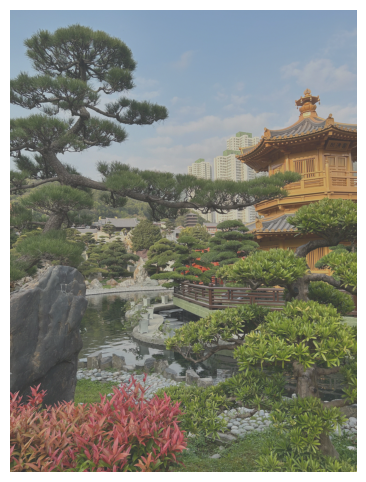

In [18]:
preview_image(denormalize_image(images[-1]), show_channels=False)

In [ ]:
images[0].min()

In [ ]:
images[0].max()